<a href="https://colab.research.google.com/github/sebacea/tallerecopub/blob/master/Taller9/Proyecto_7_Doing_Economics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oferta y demanda

[Fuente: Core Econ](https://www.core-econ.org/doing-economics/book/text/07-01.html)

## Material teórico

[Sección 7.3](https://www.core-econ.org/espp/book/text/07.html#73-the-demand-curve-and-willingness-to-pay),
[Sección 7.9](https://www.core-econ.org/espp/book/text/07.html#79-buying-and-selling-demand-and-supply-in-a-competitive-market) y [Sección 7.10](https://www.core-econ.org/espp/book/text/07.html#710-demand-and-supply-in-a-competitive-market-bakeries) 



In [ ]:
library(tidyverse)
library(readxl)
library(httr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
url1 <- 'https://tinyco.re/1316611'
GET(url1, write_disk(tf <- tempfile(fileext = ".xlsx")))
# Excel filename
wm_data = read_excel(tf,
  # Sheet name
  sheet = "Sheet1", na = "NA")

Response [https://www.core-econ.org/index.php?uamfiletype=attachment&uamgetfile=/home/u2-fh44hj396xne/www/core-econ.org/public_html/wp-content/uploads/2018/06/Project-7-datafile.xlsx]
  Date: 2021-08-31 16:16
  Status: 200
  Content-Type: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet; charset=binary
  Size: 20.6 kB
<ON DISK>  /tmp/RtmpqCrSip/file3e6122b555.xlsxNULL

In [ ]:
str(wm_data)

tibble [22 × 10] (S3: tbl_df/tbl/data.frame)
 $ Year              : num [1:22] 1930 1931 1932 1933 1934 ...
 $ log q 
(Q)     : num [1:22] 4.45 4.36 4.2 4.03 4.1 ...
 $ log h 
(X)     : num [1:22] 4.38 4.33 4.05 4.01 4.09 ...
 $ log p 
(P)     : num [1:22] 4.76 4.61 4.37 4.53 4.64 ...
 $ log p_c 
(C)   : num [1:22] 2.25 1.73 1.87 2.32 2.51 ...
 $ log p_v 
(T)   : num [1:22] 0.845 2.726 2.588 2.286 1.476 ...
 $ log w 
(W)     : num [1:22] 3.37 3.14 2.83 2.77 2.92 ...
 $ log n 
(N)     : num [1:22] 4.81 4.82 4.83 4.83 4.84 ...
 $ log(y/n) 
(Y/N): num [1:22] 6.4 6.24 5.97 5.9 6.02 ...
 $ log p_f 
(F)   : num [1:22] 2.54 2.55 2.6 2.65 2.62 ...


Let's use the `exp` function to create the variables `p` and `q` from their log counterparts (renamed as `log.p` and `log.q` respectively). We also transform the harvest variable (renamed as `log.h`) and save it as `h`. The harvest will be at most as large as the crop (`q`).

In [ ]:
names(wm_data) <- c("Year", "log.q", "log.h", "log.p", 
  "log.pc", "log.pv", "log.w", "log.n", "log.yn", "log.pf")
wm_data$p <- exp(wm_data$log.p)  # Price
wm_data$h <- exp(wm_data$log.h)  # Harvest quantity
wm_data$q <- exp(wm_data$log.q)  # Crop quantity

Let's use `plot` to produce the chart for the prices, with `Year` as the horizontal axis variable (`xlab`) and price (`p`) as the vertical axis variable (`ylab`).

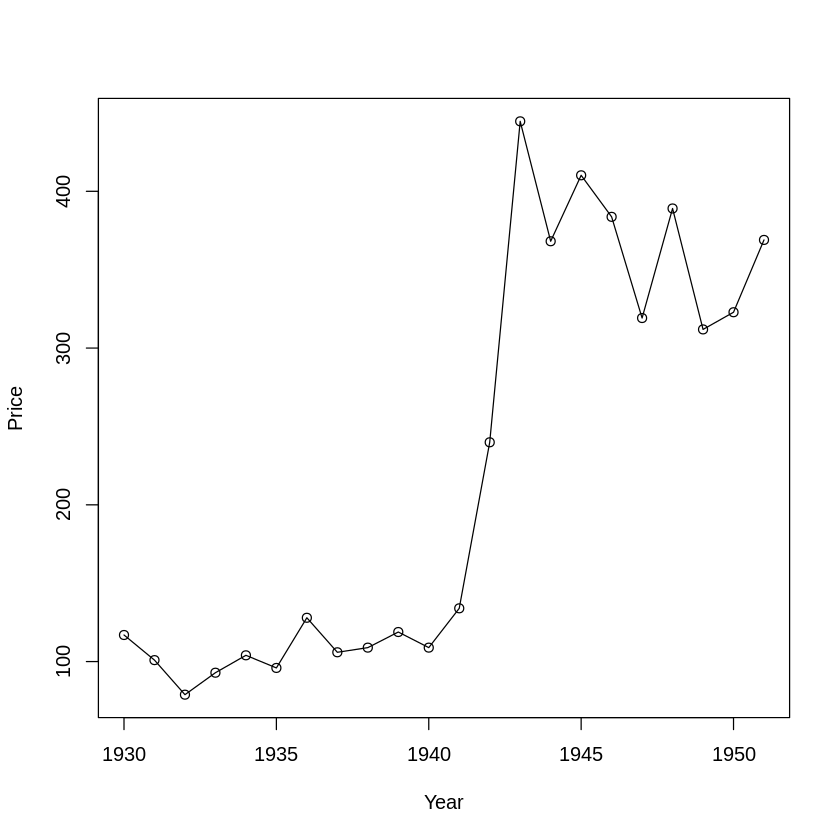

In [ ]:
# type: "p" = points, "l" = lines, "o" = points and lines
plot(wm_data$Year, wm_data$p, type = "o",
  xlab = "Year", ylab = "Price")  

Now we create the line chart for harvest and crop quantities (the variables `h` and `q`, respectively). First, we plot the crop quantities as a dashed line (`lty = "dashed"`), then use `lines` to add a solid line for the harvest data. The `legend` function adds a chart legend at the specified coordinates (the first two arguments in the function).

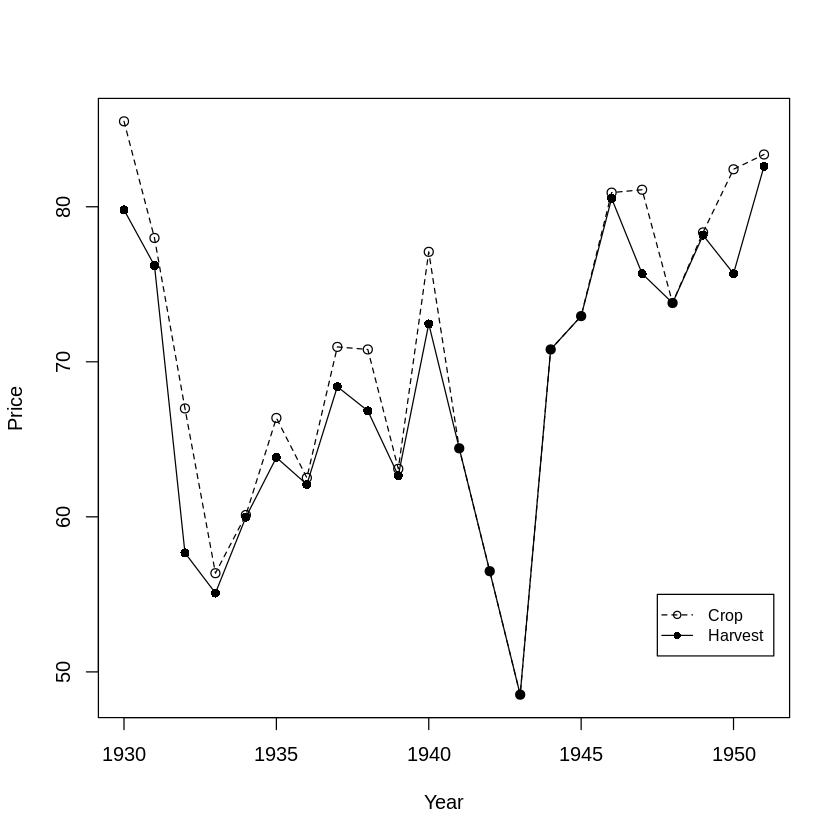

In [ ]:
# type: "p" = points, "l" = lines, "o" = points and lines
plot(wm_data$Year, wm_data$q, type = "o",
  pch = 1, lty = "dashed", 
  xlab = "Year", ylab = "Price")  

# Add the harvest data
lines(wm_data$Year, wm_data$h, type = "o", pch = 16)

# Add a legend
legend(1947.5, 55, legend = c("Crop", "Harvest"),
  col = c("black", "black"), pch = c(1, 16), 
  lty = c("dashed", "solid"), cex = 0.8)

Now we will plot supply and demand curves for a simplified version of the model given in the paper. We will define Q as the quantity of watermelons, in millions, and P as the price per thousand watermelons, and assume that the supply curve is given by the following equation:

(Supply curve): $\log P=−2.0+1.7 \log Q$ 

Using the same notation, the following equation describes the demand curve:

(Demand curve): $\log P=8.5−0.82 \log Q$
 
To plot a curve, we need to generate a series of points (vertical axis values that correspond to particular horizontal axis values) and join them up. First we will work with the variables in natural log format, and then we will convert them to the actual prices and quantities so that our supply and demand curves will be in familiar units.